In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else: 
  device = torch.device('cpu')

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())
categoryNames = ['one','two','three','four','five','six','seven','eight','nine']

0it [00:00, ?it/s]

9920512it [00:04, 2323289.23it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 125454.99it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:01, 850829.39it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 49611.79it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [12]:
len(train_dataset)

60000

In [32]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

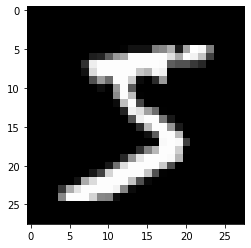

In [33]:
gen_image(train_dataset[0][0].numpy()[0]).show()

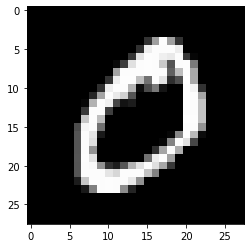

In [34]:
gen_image(train_dataset[1][0].numpy()[0]).show()

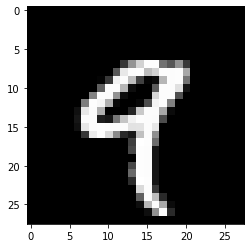

In [36]:
gen_image(train_dataset[4][0].numpy()[0]).show()